# *Credit Card Default Prediction*

## Introduction
In this project, our job is to reliably predict who is likely to default. If so, the bank may be able to prevent the loss by providing the customer with alternative options (such as forbearance or debt consolidation, etc.). Hence, we build an automated model based on the information about the client and historical transactions, capable of identifying key factors and predicting a credit card default.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### **Data Description**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Content
There are 25 variables:
- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)t (1=yes, 0=no)above)

In [2]:
# load data
dataset = pd.read_csv("UCI_Credit_Card.csv")
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [3]:
dataset.shape

(30000, 25)

In [4]:
# Summary Statistics
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The information on the dataset reported below show that there are no missing features for any of the *30,000* samples.

In [5]:
# Check missing values
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Data Cleaning
- EDUCATION and MARRIAGE have some undocumented categories. EDUCATION ranges from 0 to 6, while MARRIAGE starts at category 0.
- The presence of errors in the dataset can be addressed by correcting the wrong attribute, or by deleting the rows associated with the error. I could take a conservative approach and group the undocumented categories into others, but since anomalous entries are relatively few ( **399,1.33%**
 of the total number)I have decidedde to eliminate them.

In [6]:
# rename variable 'PAY_0' TO 'PAY_1'
dataset = dataset.rename(columns={"PAY_0": "PAY_1"})
# drop first attribute "ID"
dataset = dataset.drop(columns="ID")

In [7]:
dataset["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [8]:
# category '0' is not defined
dataset = dataset.drop(dataset[dataset["MARRIAGE"]==0].index)

In [9]:
dataset["EDUCATION"].value_counts()

EDUCATION
2    14024
1    10581
3     4873
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [10]:
# categories 0, 5 and 6 are unknown
dataset = dataset.drop(dataset[dataset['EDUCATION']==0].index)
dataset = dataset.drop(dataset[dataset['EDUCATION']==5].index)
dataset = dataset.drop(dataset[dataset['EDUCATION']==6].index)

### History of Past Payments
Below is the print of the description of the history of past payments features. The columns PAY_n range from -2 (undocumented) to 8, hence I believe they need to be rescaled to match the official description.

In [11]:
dataset[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [12]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    dataset.loc[dataset[p]<0, p] = -1
    dataset.loc[dataset[p]>=0, p] = dataset.loc[dataset[p]>=0, p] + 1
    dataset[p] = dataset[p].astype('int64')

### Amount of Bill Statement and Previous Payment
Below I print the description of the features related to the amount of bill statement and the amount of previous payment. I do not find any anomalies.

In [13]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [14]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


### Data Exploration
- In this section I show some graphs to better understand the relationship between the features and the target DEFAULT.

In [15]:
dataset["default.payment.next.month"].value_counts() #imbalanced data

default.payment.next.month
0    22996
1     6605
Name: count, dtype: int64

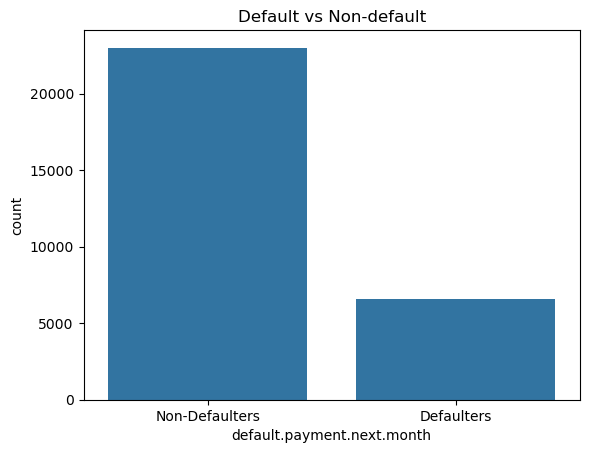

In [16]:
sns.countplot(x="default.payment.next.month",data=dataset)
plt.title("Default vs Non-default")
plt.xticks([0,1],["Non-Defaulters","Defaulters"])
plt.show()

The features SEX, EDUCATION, and MARRIAGE are plotted according to the target variable using histograms, as shown below. Whether it is male or female, the proportion of defaulters is in line with the general situation, and we can say the same for the categories of the other two features.

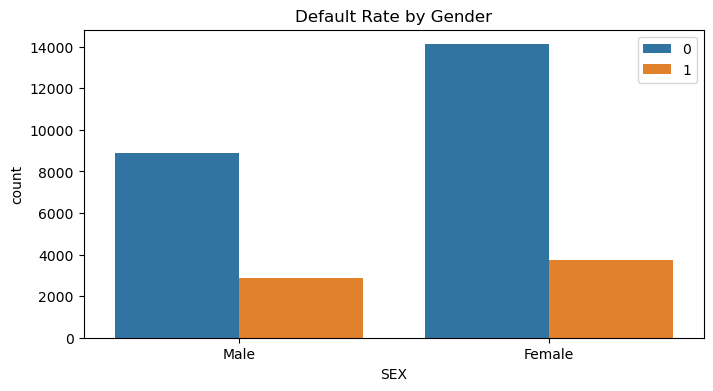

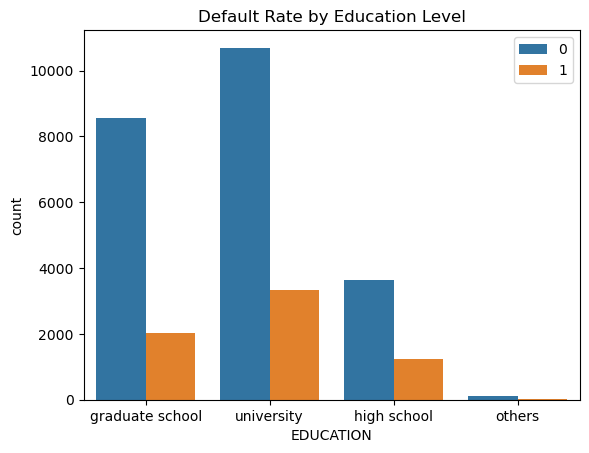

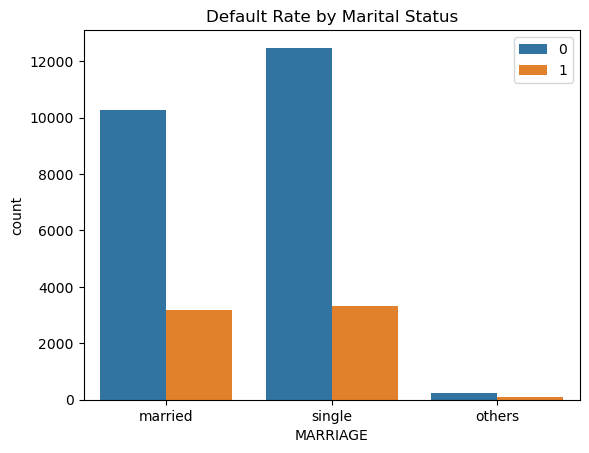

In [17]:
# Default rate by Demographics
plt.figure(figsize=(8,4))
sns.countplot(x='SEX', hue='default.payment.next.month', data=dataset)
plt.xticks([0,1],["Male","Female"])
plt.title('Default Rate by Gender')
plt.legend()
plt.show()

sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=dataset)
plt.xticks([0,1,2,3],["graduate school","university", "high school", "others"]) 
plt.title('Default Rate by Education Level')
plt.legend()
plt.show()

sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=dataset)
plt.xticks([0,1,2],["married","single","others"])
plt.title('Default Rate by Marital Status')
plt.legend()
plt.show()

The density map below suggests that those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default. This observation makes sense as a higher credit limit is given to people with higher creditworthiness that have a lower likelihood to default.

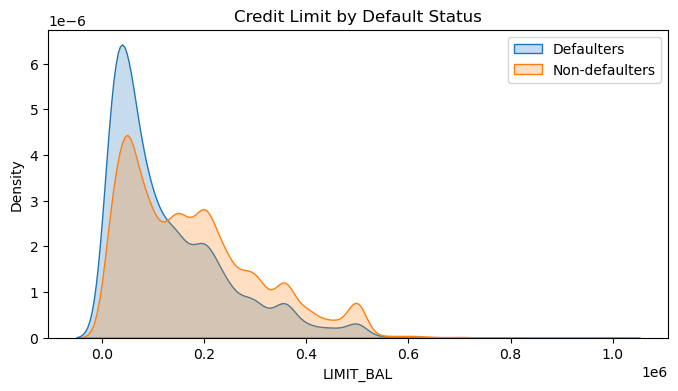

In [18]:
# Kernal density  distribution for credit limit
plt.figure(figsize=(8,4))
class_0 = dataset.loc[dataset['default.payment.next.month'] == 0]['LIMIT_BAL']
class_1 = dataset.loc[dataset['default.payment.next.month'] == 1]['LIMIT_BAL']                   
sns.kdeplot(class_1, fill=True, label='Defaulters')
sns.kdeplot(class_0, fill=True, label='Non-defaulters')
plt.title('Credit Limit by Default Status')
plt.legend()
plt.show()

The below figure suggests that the probability of non-default of age between approximately 
**25** and **40** is higher, which indicates that consumers in this age group are more capable of repaying credit card loans. This may be because their work and family tend to be stable without too much pressure.

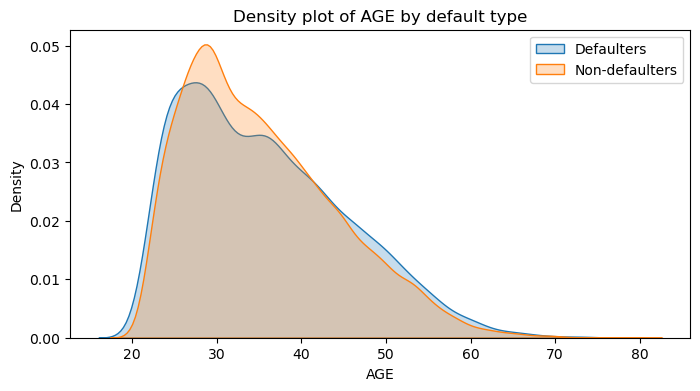

In [19]:
# kernel density function for age
plt.figure(figsize=(8,4))
class_0 = dataset.loc[dataset['default.payment.next.month'] == 0]['AGE']
class_1 = dataset.loc[dataset['default.payment.next.month'] == 1]['AGE']                   
sns.kdeplot(class_1, fill=True, label='Defaulters')
sns.kdeplot(class_0, fill=True, label='Non-defaulters')
plt.title('Density plot of AGE by default type')
plt.legend()
plt.show()

Below figure suggests that defaulters consistently have higher payment delays across multiple months.

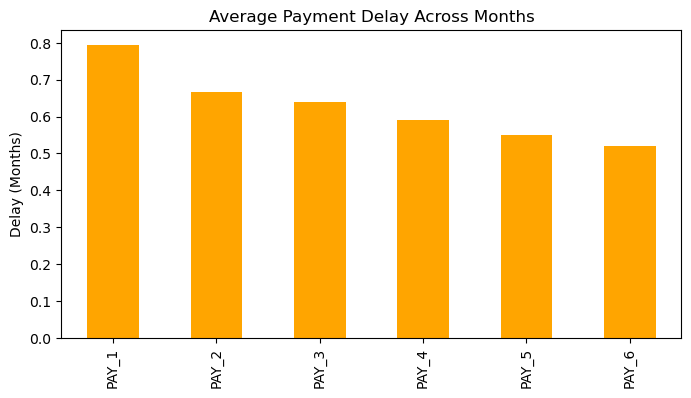

In [20]:
#Repayment Status Patterns
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
dataset[pay_cols].mean().plot(kind='bar', figsize=(8,4), color='orange')
plt.title('Average Payment Delay Across Months')
plt.ylabel('Delay (Months)')
plt.show()

### Correlation Among Features
- The considered dataset has many attributes, and the presence of strongly correlated features may lead to a drop in the performances of some classification algorithms.
- Below we show the correlation heatmap between various features and it shows that there is a strong positive correlation between the BILL_AMT and PAAY_AMT features


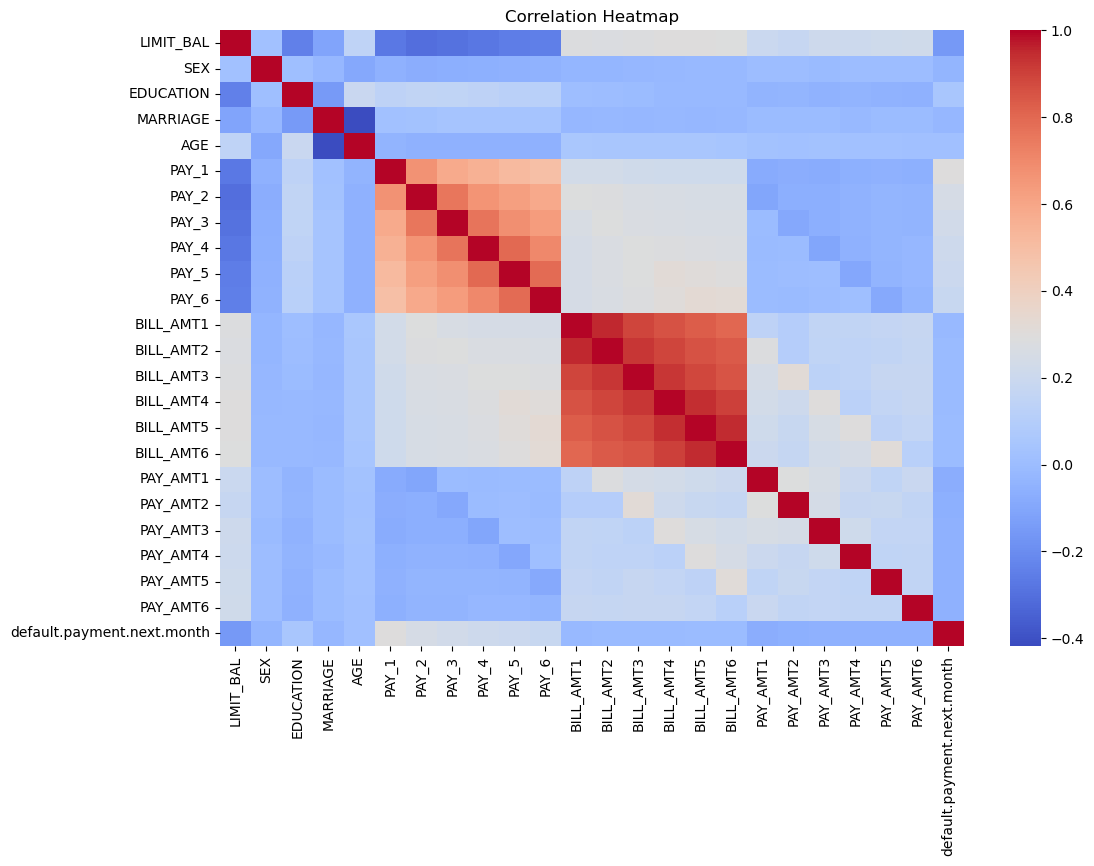

In [21]:
# Correlation 
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## One-Hot Encoding for Nominal Features

The categorical features **`EDUCATION`**, **`SEX`**, and **`MARRIAGE`** are already encoded with integer values and could technically be fed directly to a machine learning algorithm.  
However, these are **nominal features**, and it would be **sub-optimal to assume any ordering** among their values.

**Why One-Hot Encoding?**
- Removes any **artificial ordinal relationship** between categories.
- Creates a separate binary (dummy) variable for each unique category.
- Uses `0` or `1` to indicate the presence of a category.

While Scikit-Learn offers built-in one-hot encoding methods, here we **manually map the features** because:
1. There are only a few such features, so manual mapping is straightforward.
2. This helps **mitigate multicollinearity**, which can occur when features are highly correlated.

**Approach:**
- Create boolean (dummy) columns for each category in `EDUCATION`, `SEX`, and `MARRIAGE`.
- Drop the original columns a- **MALE**: 1=male;0=female
- **MARRIED**: 1 = married marital status; 0 = otherwise.
- **GRAD_SCHOOL**: 1 = graduate school level of education; 0 = otherwise.
- **UNIVERSITY**: 1 = university level of education; 0 = otherwise.
- **HIGH_SCHOOL**: 1 = high school level of education; 0 = otherwise.
- **UNIVERSITY**: 1 = university level of education; 0 = otherwise.
- **HIGH_SCHOOL**: 1 = high school level of education; 0 = otherwise.

Note that we do not lose any important information by removing a feature column, though; for example, we removed the column **EDUCATION=4** (others), but the feature information is still preserved, since if we observe **GRAD_SCHOOL=0**, **UNIVERSITY=0** and **HIGH_SCHOOL=0**, it implies that the observation must be **OTHERS**.se.
r encoding.

---



In [22]:
dataset['GRAD_SCHOOL'] = (dataset['EDUCATION'] == 1).astype('category')
dataset['UNIVERSITY'] = (dataset['EDUCATION'] == 2).astype('category')
dataset['HIGH_SCHOOL'] = (dataset['EDUCATION'] == 3).astype('category')
dataset.drop('EDUCATION', axis=1, inplace=True)

dataset['MALE'] = (dataset['SEX'] == 1).astype('category')
dataset.drop('SEX', axis=1, inplace=True)

dataset['MARRIED'] = (dataset['MARRIAGE'] == 1).astype('category')
dataset.drop('MARRIAGE', axis=1, inplace=True)

dataset.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,20000.0,24,3,3,-1,-1,-1,-1,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,False,True,False,False,True
1,120000.0,26,-1,3,1,1,1,3,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,False,True,False,False,False
2,90000.0,34,1,1,1,1,1,1,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,False,True,False,False,False
3,50000.0,37,1,1,1,1,1,1,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,False,True,False,False,True
4,50000.0,57,-1,1,-1,1,1,1,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,False,True,False,True,True


## Data Preparation: Train-Test Split & Standardization

### 1. Train-Test Split
To evaluate the **generalization ability** of our machine learning models, we split the dataset into:
- **Training set**: 80% of the data
- **Test set**: 20% of the data  

**Key choices:**
- **Stratification** on the target variable `default.payment.next.month` to preserve the relative class frequencies in both sets — important for imbalanced datasets.
- **random_state = 42** to ensure the results are reproducible.

---

### 2. Feature Scaling with Standardization
After splitting the data, we apply **standardization** to the feature columns:

- Centers each feature around a **mean of 0**
- Scales each feature to have a **standard deviation of 1**
- Ensures features follow the parameters of a **standard normal distribution**

**Why standardize?**
- Prevents features with large scales from dominating the learning process
- Makes it easier for models to learn optimal weights


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
x = dataset.drop('default.payment.next.month', axis=1, inplace=False)
y = dataset["default.payment.next.month"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # fit only on train
x_test = scaler.transform(x_test)        # transform test with same scaler

## Dealing with Class Imbalance
We showed that the dataset we are dealing with is unbalanced, as the *non-defaulter* examples are over-represented. Actually, class imbalance is a quite common problem when working with real-world data.

In [27]:
class_count = [y_train[y_train == 0].count(), y_train[y_train == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion')
class_count_df

Training set class proportion


,Number,Percentage
Non-defaulters,18396,77.69%
Defaulters,5284,22.31%


Aside from evaluating machine learning models, class imbalance influences a learning algorithm during model fitting itself. Since machine learning algorithms typically optimize a reward or cost function that is computed as a sum over the training examples that it sees during fitting, the decision rule is likely going to be biased toward the majority class.

### Synthetic Minority Oversampling Technique
The Synthetic Minority Oversampling Technique (SMOTE) was proposed to avoid the risk of overfitting faced by random oversampling. Instead of merely replicating existing observations, the technique generates artificial samples , this is achieved by linearly interpolating a randomly selected minority observation and one of its neighboring minority observations. More precisely, SMOTE executes three steps to generate a synthetic sample. 
1. Firstly, it chooses a random minority observation $\vec{a}$.
2. Among its $k$ nearest minority class neighbors, instance $\vec{b}$ is selected.
3. Finally, a new sample $\vec{x}$ is created by randomly interpolating the two samples: $\vec{x}=\vec{a}+w\times(\vec{b}-\vec{a})$, where $w$ is a random weight in $[0,1]$.
   
In the dataframe below we show the result of SMOTE oversampling. Now the training set is balanced and the number of *defaulters* equals the number of *non-defaulters*.

In [28]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)

In [29]:
class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after SMOTE Oversampling')
class_count_df

Training set class proportion after SMOTE Oversampling


,Number,Percentage
Non-defaulters,18396,50.00%
Defaulters,18396,50.00%


## Choice of Models

For this project, three different classification algorithms were selected — **Logistic Regression**, **Random Forest**, and **XGBoost** — to ensure diversity in modeling approaches and to compare performance across linear and non-linear methods.

### 1. Logistic Regression
- **Type:** Linear model
- **Reason for selection:**
  - Simple, interpretable, and computationally efficient.
  - Provides direct probability estimates for the likelihood of default.
  - Acts as a baseline model to compare against more complex algorithms.
  - Useful for identifying linear relationships between demographic/financial features and default risk.

### 2. Random Forest
- **Type:** Ensemble method (bagging)
- **Reason for selection:**
  - Handles **non-linear** feature interactions without requiring extensive preprocessing.
  - Reduces overfitting through averaging multiple decision trees.
  - Robust to noisy data and can handle mixed data types (categorical + numerical).
  - Provides feature importance measures to identify key predictors of default.

### 3. XGBoost (Extreme Gradient Boosting)
- **Type:** Ensemble method (boosting)
- **Reason for selection:**
  - Highly effective for imbalanced datasets due to boosting strategy.
  - Known for achieving high accuracy in structured/tabular data.
  - Handles complex, non-linear decision boundaries well.
  - Includes built-in regularization to prevent overfitting.

---

By combining **Logistic Regression** (linear baseline) with **Random Forest** and **XGBoost** (non-linear ensemble methods), the project ensures a well-rounded evaluation of model performance across different learning paradigms.


## Model Performance Comparison (With and Without SMOTE)

The table below summarizes the performance of Logistic Regression, Random Forest, and XGBoost models on the test dataset, both on raw data and after applying SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance.

### Observations:

1. **Without SMOTE (Raw Data)**  
   - Logistic Regression achieves the highest **precision** (0.7389) but the lowest **recall** (0.1885), indicating it is highly conservative in predicting positives but misses many actual positive cases.  
   - Random Forest and XGBoost both show better recall (~0.36–0.38) compared to Logistic Regression, but at the cost of slightly lower precision.  

2. **With SMOTE (Balanced Data)**  
   - Recall improves significantly for **Logistic Regression** (from 0.1885 to 0.6775), making it more sensitive to positive cases, though accuracy drops due to more false positives.  
   - Random Forest and XGBoost also see recall improvements, but not as dramatic as Logistic Regression.  
   - Random Forest (SMOTE) achieves the best **F1 Score** (0.5044) among all models, balancing both recall and precision.  

3. **Trade-offs**  
   - SMOTE generally increases recall but can reduce precision and overall accuracy, as the model becomes more inclined to predict positives.  
   - For problems where **catching positive cases is more important than overall accuracy** (e.g., fraud detection, medical diagnosis), a higher recall model like **Logistic Regression (SMOTE)** may be preferred.  
   - If a balanced trade-off between recall and precision is desired, **Random Forest (SMOTE)** performs well.


- **If recall is the priority:** Logistic Regression (SMOTE) is the best choice.  
- **If balanced performance is needed:** Random Forest (SMOTE) offers the best F1 Score.  


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary to store results
results = []

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1 Score": f1_score(y_test, y_pred_log)
})

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
})

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb)
})

# Create DataFrame
results_df = pd.DataFrame(results)

# Display comparison table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.804087   0.738872  0.188494  0.300362
1        Random Forest  0.813376   0.638107  0.377744  0.474560
2              XGBoost  0.809323   0.628686  0.355034  0.453798


In [31]:
# Train Logistic Regression on SMOTE data 
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(x_train_smote, y_train_smote)

# Predictions on test set
y_pred_smote = log_reg_smote.predict(x_test)

# Metrics
results.append ({
    "Model": "Logistic Regression (SMOTE)",
    "Accuracy": accuracy_score(y_test, y_pred_smote),
    "Precision": precision_score(y_test, y_pred_smote),
    "Recall": recall_score(y_test, y_pred_smote),
    "F1 Score": f1_score(y_test, y_pred_smote)
})
# Train RandomForestClassifier on SMOTE data 
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(x_train_smote, y_train_smote)
y_pred_smoterf = rf_model_smote.predict(x_test)
results.append({
    "Model": "Random Forest (SMOTE)",
    "Accuracy": accuracy_score(y_test, y_pred_smoterf),
    "Precision": precision_score(y_test, y_pred_smoterf),
    "Recall": recall_score(y_test, y_pred_smoterf),
    "F1 Score": f1_score(y_test, y_pred_smoterf)
})

# Train XGBOOST on SMOTE data 
xgb_model_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_smote.fit(x_train_smote, y_train_smote)
y_pred_smotexgb = xgb_model_smote.predict(x_test)
results.append({
    "Model": "XGBoost (SMOTE)",
    "Accuracy": accuracy_score(y_test, y_pred_smotexgb),
    "Precision": precision_score(y_test, y_pred_smotexgb),
    "Recall": recall_score(y_test, y_pred_smotexgb),
    "F1 Score": f1_score(y_test, y_pred_smotexgb)
})

# Create DataFrame
results_df = pd.DataFrame(results)

# Display comparison table
print(results_df)

                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.804087   0.738872  0.188494  0.300362
1                Random Forest  0.813376   0.638107  0.377744  0.474560
2                      XGBoost  0.809323   0.628686  0.355034  0.453798
3  Logistic Regression (SMOTE)  0.619490   0.328802  0.677517  0.442741
4        Random Forest (SMOTE)  0.792265   0.539190  0.473883  0.504432
5              XGBoost (SMOTE)  0.800034   0.572487  0.409538  0.477493


## Model Performance Visualization

To better understand and compare the performance of the models, we create a bar plot showing:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

The models are sorted by their F1 Score (highest to lowest) to highlight the best-performing model.  
This visualization allows for a quick and intuitive comparison of model strengths and weaknesses.


<Figure size 1000x1200 with 0 Axes>

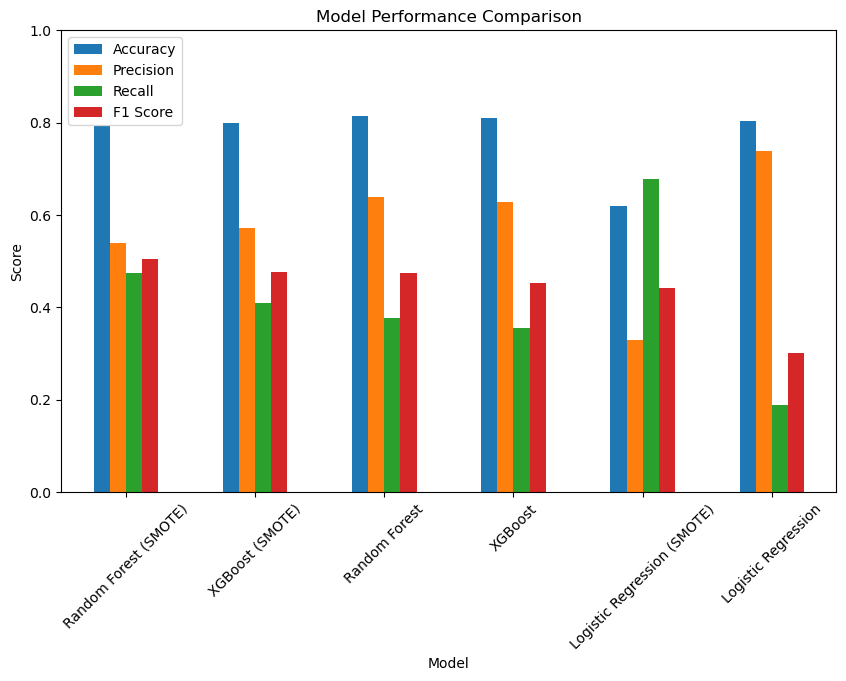

In [32]:
results_df = results_df.sort_values(by="F1 Score", ascending=False)
plt.figure(figsize= (10,12))
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### Hyperparameter Tuning

To improve model performance and ensure optimal parameter selection, we applied different tuning strategies for the three models:

1. **Logistic Regression with GridSearchCV Score**

2. **Random Forest with RandomizedSearchCv range**

3. **XGBoost with RandomizedSearchCV**

### Cross-Validation with SMOTE for Logistic Regression, Random Forest, and XGBoost

In this step, we perform **Stratified K-Fold Cross-Validation** on all three models — Logistic Regression, Random Forest, and XGBoost — while applying **SMOTE (Synthetic Minority Over-sampling Technique)** inside the training folds.  

**Key points:**
- **SMOTE** is applied only on the training set within each fold to prevent data leakage.
- The evaluation metric for model selection is **Recall**, as our primary goal is to correctly identify as many default cases as possible.
- **StratifiedKFold** ensures each fold maintains the original proportion of default vs. non-default cases.
- For each fold, we record recall scores and then compute the mean recall for final comparison.

**Reason for Choosing Recall as Scoring Metric:**
In credit default prediction, **false negatives** (missed defaulters) are more costly than false positives.  
Prioritizing recall ensures that we minimize the chance of classifying a defaulter as a non-defaulter, even if it means sacrificing some precision.

**Process Overview:**
1. Initialize StratifiedKFold with `n_splits=5` and `shuffle=True` for randomness.
2. For each split:
   - Apply SMOTE to oversample the minority class in the training fold.
   - Train the model on the balanced data.
   - Test the model on the untouched validation fold.
   - Store recall scores.
3. Calculate and compare average recall for all three models.

The final results will help identify the model that best captures defaulters while keeping an acceptable balance with other metrics.


In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [35]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr = GridSearchCV(estimator=log_reg_smote, param_grid=param_grid_lr, 
                       cv=skf, scoring='recall', n_jobs=-1, verbose=1)
# Fit to training data
grid_lr.fit(x_train_smote, y_train_smote)

# Best parameters and CV score
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best CV Recall :", grid_lr.best_score_)

# Evaluate best model on test data
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(x_test)
print("Test Recall (LR):", recall_score(y_test, y_pred_smote))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Recall : 0.697706843778437
Test Recall (LR): 0.6775170325510976


In [38]:
from sklearn.model_selection import RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search_rf = RandomizedSearchCV(estimator=rf_model_smote, param_distributions=param_dist_rf,n_iter=20, 
                       cv=skf, scoring='recall', n_jobs=-1, verbose=1)
random_search_rf.fit(x_train_smote, y_train_smote)

print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best CV Recall:", random_search_rf.best_score_)

best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
print("Test Recall (RF):", recall_score(y_test, y_pred_smoterf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best CV Recall: 0.8377904410461255
Test Recall (RF): 0.4738834216502649


In [40]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
random_search_xgb = RandomizedSearchCV(estimator=xgb_model_smote,param_distributions=param_dist_xgb,
    n_iter=30,cv=skf,scoring='recall', n_jobs=-1, verbose=1, random_state=42
)

random_search_xgb.fit(x_train_smote, y_train_smote)

print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best CV recall:", random_search_xgb.best_score_)

best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
print("Test recall (XGB):", recall_score(y_test, y_pred_smotexgb))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best CV recall: 0.8264293079404847
Test recall (XGB): 0.40953822861468586


## Model Performance Visualization and Detailed Metrics

To gain deeper insights into the performance of each model beyond aggregate metrics like accuracy, precision, recall, and F1-score, we visualize and analyze the following for all three models (Logistic Regression, Random Forest, and XGBoost):

1. **ROC Curve (Receiver Operating Characteristic Curve)**  
   - Plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds.  
   - The **Area Under the Curve (AUC)** gives a single value summarizing model performance — higher AUC indicates better distinction between positive and negative classes.

2. **Confusion Matrix**  
   - A table that shows the number of true positives, false positives, true negatives, and false negatives.  
   - This allows us to understand **where** the model is making errors (e.g., missing positive cases or misclassifying negatives as positives).

3. **Classification Report**  
   - Provides precision, recall, and F1-score for each class separately.  
   - This is especially useful in imbalanced datasets where accuracy alone can be misleading.

### Why This Step is Important:
- For imbalanced datasets, recall (sensitivity) is often critical when the cost of missing positive cases is high.  
- The ROC curve provides a threshold-independent measure of model performance.  
- The confusion matrix and classification report offer **class-level** performance, allowing us to evaluate trade-offs between precision and recall.

We will perform these visualizations and analyses for:
- Logistic Regression (with SMOTE)
- Random Forest (with SMOTE)- XGBoost (with SMOTE)
of precision.


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [42]:
best_params_lr = {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
final_lr = LogisticRegression(**best_params_lr, random_state=42)
final_lr.fit(x_train_smote, y_train_smote)

y_pred = final_lr.predict(x_test)
y_proba = final_lr.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6172943759500085
Precision: 0.3287422979340341
Recall: 0.6866010598031794
F1 Score: 0.4446078431372549
ROC-AUC: 0.7197885330612513

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.60      0.71      4600
           1       0.33      0.69      0.44      1321

    accuracy                           0.62      5921
   macro avg       0.60      0.64      0.58      5921
weighted avg       0.75      0.62      0.65      5921



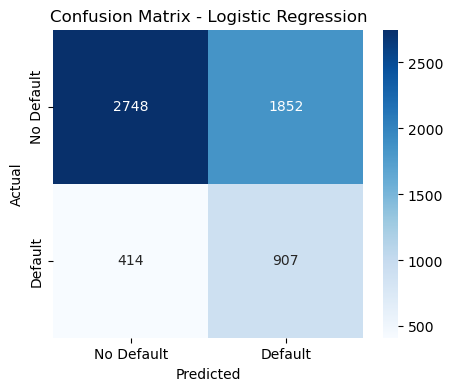

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

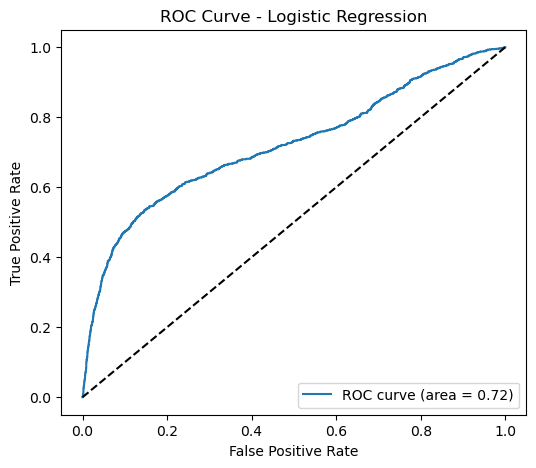

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [47]:
best_params_rf = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2,
                  'max_depth': None, 'bootstrap': False}
final_rf = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf.fit(x_train_smote, y_train_smote)

y_pred_rf = final_rf.predict(x_test)
y_proba_rf = final_rf.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7927714913021449
Precision: 0.541814946619217
Recall: 0.4610143830431491
F1 Score: 0.498159509202454
ROC-AUC: 0.749601750979166

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4600
           1       0.54      0.46      0.50      1321

    accuracy                           0.79      5921
   macro avg       0.70      0.67      0.68      5921
weighted avg       0.78      0.79      0.79      5921



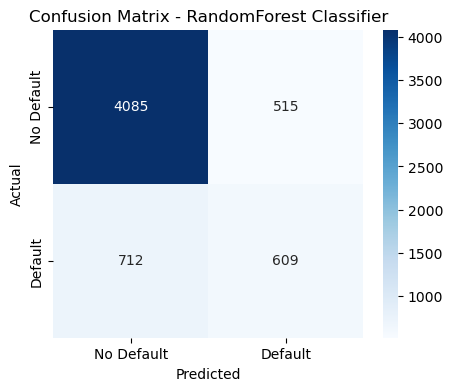

In [48]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - RandomForest Classifier')
plt.show()

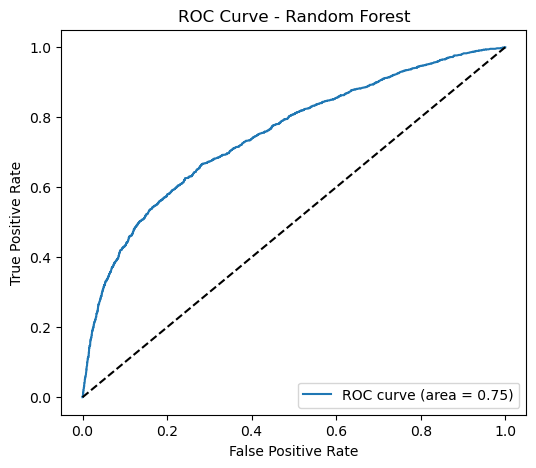

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [51]:
best_params_xgb = {'subsample': 0.8, 'n_estimators': 200,
                   'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
final_xgb = XGBClassifier(**best_params_xgb, random_state=42)
final_xgb.fit(x_train_smote, y_train_smote)

y_pred_xgb = final_xgb.predict(x_test)
y_proba_xgb = final_xgb.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.8000337780780273
Precision: 0.5715778474399164
Recall: 0.4140802422407267
F1 Score: 0.48024582967515367
ROC-AUC: 0.7416323272882862

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      4600
           1       0.57      0.41      0.48      1321

    accuracy                           0.80      5921
   macro avg       0.71      0.66      0.68      5921
weighted avg       0.78      0.80      0.79      5921



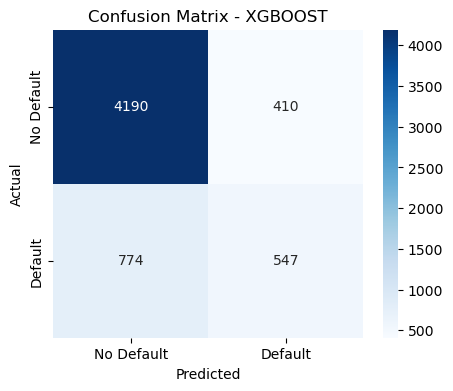

In [53]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBOOST')
plt.show()

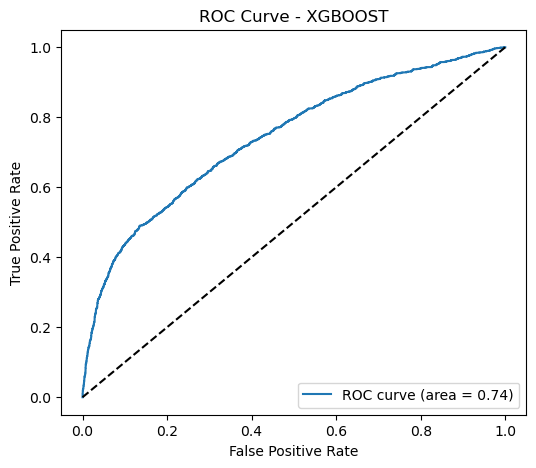

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba_xgb):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBOOST')
plt.legend(loc="lower right")
plt.show()

## Conclusion

In this project, we aimed to predict the likelihood of credit card default using demographic and financial behavior data from the **UCI Credit Card dataset**.  
Three different machine learning models were implemented and evaluated: **Logistic Regression**, **Random Forest**, and **XGBoost**.

Given the dataset’s **class imbalance** (fewer defaults than non-defaults), we applied **SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic samples for the minority class, and used **Stratified K-Fold Cross-Validation** to preserve class distribution during training.

### Key Findings:
- **Logistic Regression** achieved the best balance between cross-validation and test set recall, making it more reliable for identifying default cases.  
- **Random Forest** and **XGBoost** had higher cross-validation recall but suffered significant drops on the test set, indicating overfitting.
- The models were compared using **Recall** as the main metric, since in the context of credit risk, missing a default case (false negative) is costlier than incorrectly flagging a non-default case (false positive).

**Final Recall Scores on Test Data:**
- Logistic Regression (SMOTE): ~0.686  
- Random Forest (SMOTE): ~0.481 
- XGBoost (SMOTE): ~0.410  

### Interpretation:
- Logistic Regression’s performance suggests that simpler models may generalize better in this case.
- Ensemble models showed strong learning during cross-validation
- ROC curves, confusion matrices, and classification reports confirmed that while all models could separate classes to some extent, Logistic Regression had the most consistent performance.

**Business Implication:**  
If implemented, Logistic Regression could serve as a **first-level screening tool** for identifying customers likely to default, after which more targeted analysis or interventions could be carried out.

---
